In [ ]:
!pip 

In [188]:
import pandas as pd
import numpy as np
import time
import seaborn as sns

In [191]:
df = pd.read_csv('df_sensor_stop101.csv').drop(['Unnamed: 0', 'next_time', 'next_stop_101_time' ], axis=1)
print(df.shape)
df.head()

(9921, 16)


,time,humi_s101,humi_s1021,humi_s1022,humi_s103,press_s101,press_s1021,press_s1022,press_s103,temp_s101,temp_s1021,temp_s1022,temp_s103,next_stop_101_type,next_stop_101_information,RUL_101
0,2023-03-07 08:29:58.000000,NaN,21474836.47,0.0,44.37,974.28,3462.51,0.0,-3538.14,24.79,19.69,0.0,21.73,Reparatör på plats,101. Drivning påläggningsdorn,0 days 00:15:02.202000
1,2023-03-07 08:30:26.000000,NaN,21474836.47,0.0,44.48,974.43,3462.51,0.0,-3538.14,24.69,19.69,0.0,21.73,Reparatör på plats,101. Drivning påläggningsdorn,0 days 00:14:34.202000
2,2023-03-07 08:30:56.000000,NaN,21474836.47,0.0,44.15,974.49,3462.51,0.0,-3538.14,24.69,19.73,0.0,21.74,Reparatör på plats,101. Drivning påläggningsdorn,0 days 00:14:04.202000
3,2023-03-07 08:30:56.000000,NaN,21474836.47,0.0,43.88,974.18,3462.51,0.0,-3538.14,24.54,75.14,0.0,21.76,Reparatör på plats,101. Drivning påläggningsdorn,0 days 00:14:04.202000
4,2023-03-07 08:31:23.000000,NaN,21474836.47,0.0,44.16,974.14,3462.51,0.0,-3538.14,24.47,19.73,0.0,21.77,Reparatör på plats,101. Drivning påläggningsdorn,0 days 00:13:37.202000


In [192]:
df.time = df.time.astype('datetime64')
def convert_to_minutes(x):
    try:
        minutes = int(str(x)[-15:-13]) * 60 + int(str(x)[-12:-10]) + float(str(x)[-9:]) / 60
        return minutes
    except ValueError:
        return pd.NA
df['RUL_101_minutes'] = df['RUL_101'].apply(convert_to_minutes)
df['RUL_101_minutes'] = pd.to_numeric(df['RUL_101_minutes'], errors='coerce').astype(float)
df = df.drop('RUL_101', axis=1)
df.describe(include='all').T

C:\Users\R\AppData\Local\Temp\ipykernel_3372\2553257638.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
time,9921,9920,2023-03-07 08:30:56,2,2023-03-07 08:29:58,2023-03-20 06:15:20.245297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humi_s101,8921.0,NaN,NaN,NaN,NaT,NaT,14150732.660853,10176692.445243,9.56,39.63,21474836.47,21474836.47,21474836.47
humi_s1021,9921.0,NaN,NaN,NaN,NaT,NaT,12273138.280852,10621513.647887,0.0,41.56,21474836.47,21474836.47,21474836.47
humi_s1022,9921.0,NaN,NaN,NaN,NaT,NaT,3.495887,7.39328,0.0,0.0,0.0,0.0,19.13
humi_s103,9921.0,NaN,NaN,NaN,NaT,NaT,8666.643313,431137.986359,0.0,0.0,0.0,0.0,21474836.47
press_s101,9921.0,NaN,NaN,NaN,NaT,NaT,2729.101626,1352.769716,-4082.92,3230.97,3230.97,3230.97,3474.52
press_s1021,9921.0,NaN,NaN,NaN,NaT,NaT,2816.689975,2016.362429,-4138.52,3474.43,3474.43,3474.43,3614.77
press_s1022,9921.0,NaN,NaN,NaN,NaT,NaT,627.148881,1326.326688,0.0,0.0,0.0,0.0,3431.85
press_s103,9921.0,NaN,NaN,NaN,NaT,NaT,-256.377017,1138.744347,-3538.14,0.0,0.0,0.0,3453.57
temp_s101,9921.0,NaN,NaN,NaN,NaT,NaT,12926952.200995,10495807.451017,-34.08,24.07,21474836.47,21474836.47,21474836.47


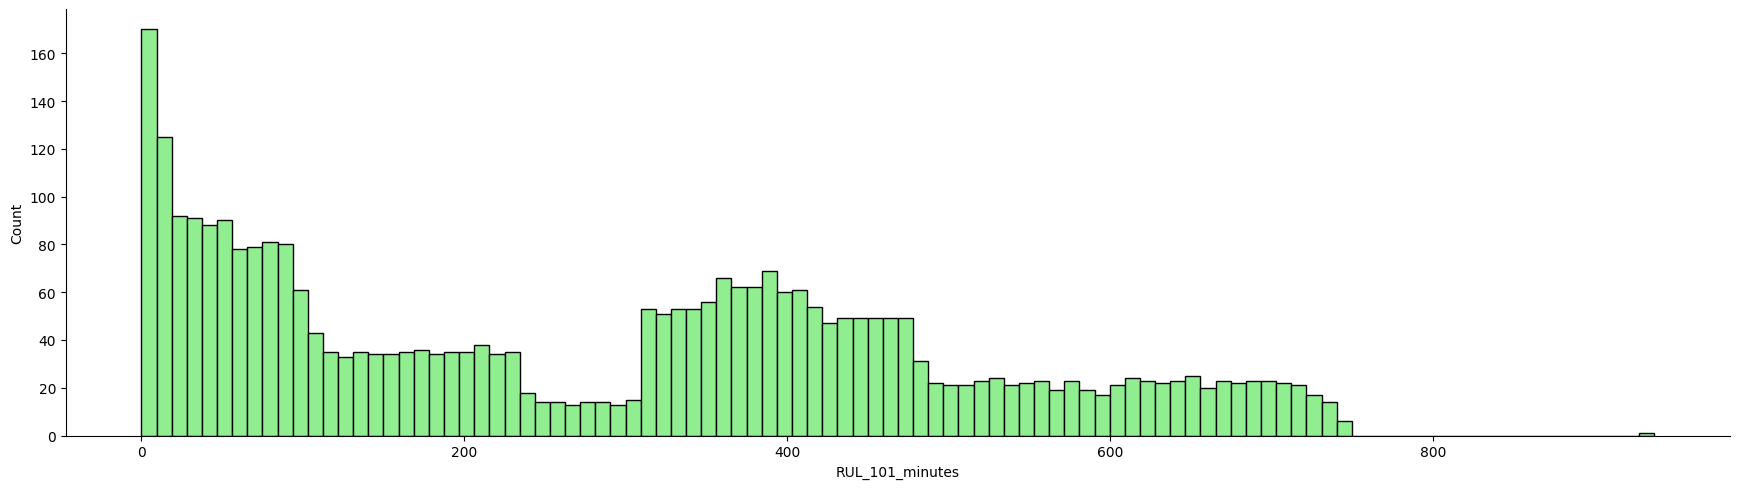

In [132]:
sns.displot(data=df, x="RUL_101_minutes", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)

In [133]:
df.dtypes

time                         datetime64[ns]
humi_s101                           float64
humi_s1021                          float64
humi_s1022                          float64
humi_s103                           float64
press_s101                          float64
press_s1021                         float64
press_s1022                         float64
press_s103                          float64
temp_s101                           float64
temp_s1021                          float64
temp_s1022                          float64
temp_s103                           float64
next_stop_101_type                   object
next_stop_101_information            object
RUL_101_minutes                     float64
dtype: object

In [134]:
df.nunique()

time                         9920
humi_s101                     381
humi_s1021                    506
humi_s1022                      2
humi_s103                     848
press_s101                    681
press_s1021                   166
press_s1022                     2
press_s103                    462
temp_s101                     375
temp_s1021                    200
temp_s1022                      2
temp_s103                     165
next_stop_101_type              2
next_stop_101_information       5
RUL_101_minutes              3253
dtype: int64

In [235]:
value_counts = df.humi_s101.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(5)
percentage = (top_values / len(df)) * 100
print(percentage)
df.humi_s101.value_counts()

21474836.47    59.227900
39.63          15.008568
NaN            10.079629
34.75           1.280113
33.21           0.715654
Name: humi_s101, dtype: float64


21474836.47    5876
39.63          1489
34.75           127
33.21            71
34.89            68
               ... 
32.39             1
32.99             1
32.51             1
35.20             1
32.32             1
Name: humi_s101, Length: 381, dtype: int64

In [244]:
value_counts = df.humi_s1021.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.humi_s1021.value_counts)
percentage

<bound method IndexOpsMixin.value_counts of 0       21474836.47
1       21474836.47
2       21474836.47
3       21474836.47
4       21474836.47
           ...     
9916          42.65
9917          42.65
9918          42.65
9919          42.65
9920          42.65
Name: humi_s1021, Length: 9921, dtype: float64>


21474836.47    57.111178
40.82          15.169842
42.65           2.136881
Name: humi_s1021, dtype: float64

In [245]:
value_counts = df.humi_s1022.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.humi_s1022.value_counts())
percentage

0.00     8108
19.13    1813
Name: humi_s1022, dtype: int64


0.00     81.725632
19.13    18.274368
Name: humi_s1022, dtype: float64

In [246]:
value_counts = df.humi_s103.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.humi_s103.value_counts())
percentage

0.00     7919
39.00       8
43.24       8
38.32       7
39.47       7
         ... 
36.88       1
37.82       1
43.07       1
35.55       1
36.92       1
Name: humi_s103, Length: 848, dtype: int64


0.00     79.820583
43.24     0.080637
39.00     0.080637
Name: humi_s103, dtype: float64

In [249]:
value_counts = df.press_s101.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(5)
percentage = (top_values / len(df)) * 100
print(df.press_s101.value_counts())
percentage

 3230.97    6022
 3474.52    1910
 2102.78     577
-2128.94     376
-3510.39      31
            ... 
 969.49        1
 969.48        1
 969.45        1
 969.96        1
 910.36        1
Name: press_s101, Length: 681, dtype: int64


 3230.97    60.699526
 3474.52    19.252092
 2102.78     5.815946
-2128.94     3.789941
-3510.39     0.312469
Name: press_s101, dtype: float64

In [251]:
value_counts = df.press_s1021.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(6)
percentage = (top_values / len(df)) * 100
print(df.press_s1021.value_counts())
percentage

 3474.43    6034
 3600.55    1754
 3462.51    1041
-3527.70     791
 0.00         72
            ... 
 1105.18       1
 1105.34       1
 1105.19       1
 1105.21       1
 996.64        1
Name: press_s1021, Length: 166, dtype: int64


 3474.43    60.820482
 3600.55    17.679669
 3462.51    10.492894
-3527.70     7.972987
 0.00        0.725733
-3890.06     0.151194
Name: press_s1021, dtype: float64

In [252]:
value_counts = df.press_s1022.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.press_s1022.value_counts())
percentage

0.00       8108
3431.85    1813
Name: press_s1022, dtype: int64


0.00       81.725632
3431.85    18.274368
Name: press_s1022, dtype: float64

In [254]:
value_counts = df.press_s103.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(6)
percentage = (top_values / len(df)) * 100
print(df.press_s103.value_counts())
percentage

 0.00       7919
-3538.14     998
 976.92       10
 977.82        7
 973.83        6
            ... 
 973.64        1
 976.01        1
 976.06        1
 976.08        1
-3532.99       1
Name: press_s103, Length: 462, dtype: int64


 0.00       79.820583
-3538.14    10.059470
 976.92      0.100796
 977.82      0.070557
 973.83      0.060478
 972.93      0.060478
Name: press_s103, dtype: float64

In [255]:
value_counts = df.temp_s101.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(6)
percentage = (top_values / len(df)) * 100
print(df.temp_s101.value_counts())
percentage

21474836.47    5956
22.24          1493
24.50           131
25.56            87
24.68            77
               ... 
22.72             1
53.09             1
11468997.12       1
23.49             1
22.39             1
Name: temp_s101, Length: 375, dtype: int64


21474836.47    60.034271
22.24          15.048886
24.50           1.320431
25.56           0.876928
24.68           0.776131
24.72           0.735813
Name: temp_s101, dtype: float64

In [256]:
value_counts = df.temp_s1021.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.temp_s1021.value_counts())
percentage

 21474836.47    5316
 20.62          1571
 21.20           210
 21.14           193
 19.38           178
                ... 
 21.64             1
 21.63             1
 21.58             1
 74.83             1
-1.42              1
Name: temp_s1021, Length: 200, dtype: int64


21474836.47    53.583308
20.62          15.835097
21.20           2.116722
Name: temp_s1021, dtype: float64

In [257]:
value_counts = df.temp_s1022.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
print(df.temp_s1022.value_counts())
percentage

0.0     8108
33.6    1813
Name: temp_s1022, dtype: int64


0.0     81.725632
33.6    18.274368
Name: temp_s1022, dtype: float64

In [259]:
value_counts = df.temp_s103.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(6)
percentage = (top_values / len(df)) * 100
print(df.temp_s103.value_counts())
percentage

0.00     7919
21.85      44
21.81      44
21.84      42
21.27      41
         ... 
20.17       1
22.04       1
20.30       1
20.01       1
19.54       1
Name: temp_s103, Length: 165, dtype: int64


0.00     79.820583
21.81     0.443504
21.85     0.443504
21.84     0.423344
21.27     0.413265
21.78     0.362867
Name: temp_s103, dtype: float64

NaN                              67.200887
101. Avskärning väv               9.676444
101. Drivning påläggningsdorn     9.192622
101. Matning rörmagasin           7.448846
101. Rör utan väv                 6.148574
101. Vävvagn                      0.332628
Name: next_stop_101_information, dtype: float64

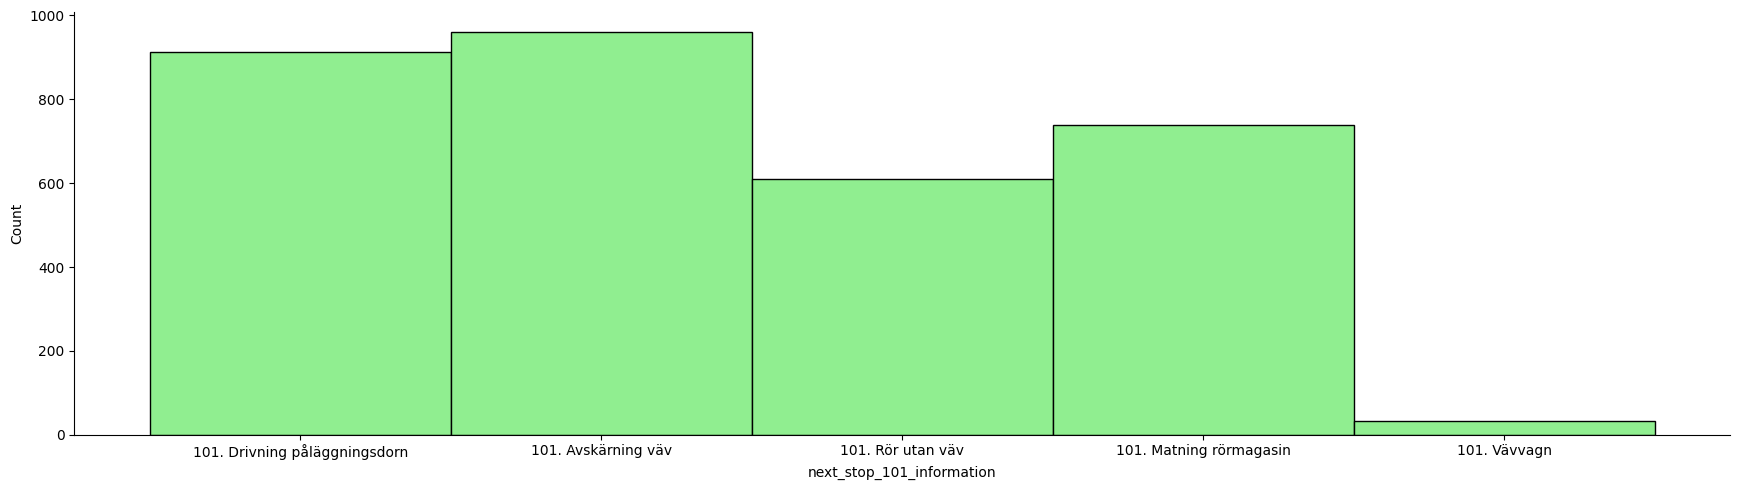

In [261]:
value_counts = df.next_stop_101_information.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(9)
percentage = (top_values / len(df)) * 100
sns.displot(data=df, x="next_stop_101_information", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
# print(df.next_stop_101_information.value_counts())
percentage

NaN                   67.200887
Mekaniskt fel         24.412862
Reparatör på plats     8.386251
Name: next_stop_101_type, dtype: float64

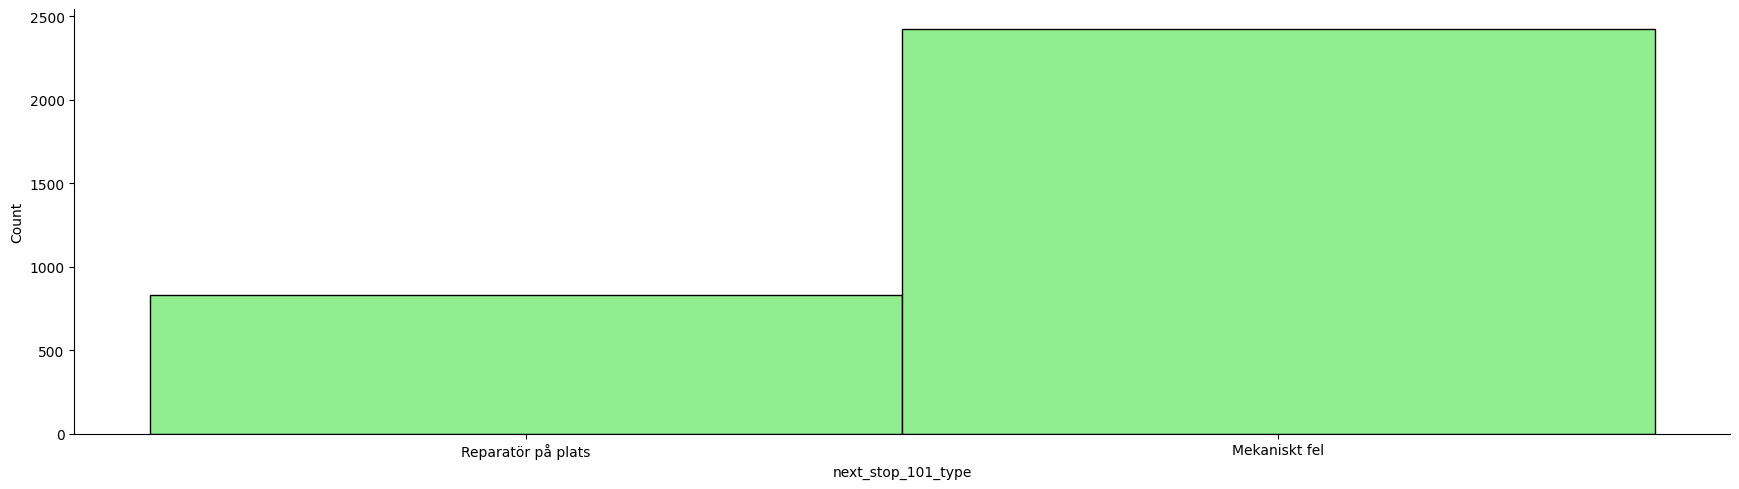

In [151]:
value_counts = df.next_stop_101_type.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
sns.displot(data=df, x="next_stop_101_type", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
percentage

In [172]:
df2 = pd.read_csv('df_sensor_stop102.csv').drop(['Unnamed: 0', 'next_time', 'next_stop_102_time' ], axis=1)
df3 = pd.read_csv('df_sensor_stop103.csv').drop(['Unnamed: 0', 'next_time', 'next_stop_103_time' ], axis=1)

df2['RUL_102_minutes'] = df2['RUL_102'].apply(convert_to_minutes)
df2['RUL_102_minutes'] = pd.to_numeric(df2['RUL_102_minutes'], errors='coerce').astype(float)
df2 = df2.drop('RUL_102', axis=1)
df3['RUL_103_minutes'] = df3['RUL_101'].apply(convert_to_minutes)
df3['RUL_103_minutes'] = pd.to_numeric(df3['RUL_103_minutes'], errors='coerce').astype(float)
df3 = df3.drop('RUL_101', axis=1)
df2.head()

,time,humi_s101,humi_s1021,humi_s1022,humi_s103,press_s101,press_s1021,press_s1022,press_s103,temp_s101,temp_s1021,temp_s1022,temp_s103,next_stop_102_type,next_stop_102_information,RUL_102_minutes
0,2023-03-07 08:29:58.000000,NaN,21474836.47,0.0,44.37,974.28,3462.51,0.0,-3538.14,24.79,19.69,0.0,21.73,Mekaniskt fel,102. Avskjutning rullar,50.931950
1,2023-03-07 08:30:26.000000,NaN,21474836.47,0.0,44.48,974.43,3462.51,0.0,-3538.14,24.69,19.69,0.0,21.73,Mekaniskt fel,102. Avskjutning rullar,50.465283
2,2023-03-07 08:30:56.000000,NaN,21474836.47,0.0,44.15,974.49,3462.51,0.0,-3538.14,24.69,19.73,0.0,21.74,Mekaniskt fel,102. Avskjutning rullar,49.965283
3,2023-03-07 08:30:56.000000,NaN,21474836.47,0.0,43.88,974.18,3462.51,0.0,-3538.14,24.54,75.14,0.0,21.76,Mekaniskt fel,102. Avskjutning rullar,49.965283
4,2023-03-07 08:31:23.000000,NaN,21474836.47,0.0,44.16,974.14,3462.51,0.0,-3538.14,24.47,19.73,0.0,21.77,Mekaniskt fel,102. Avskjutning rullar,49.515283


NaN                   67.200887
Mekaniskt fel         20.743877
Reparatör på plats    12.055236
Name: next_stop_102_type, dtype: float64

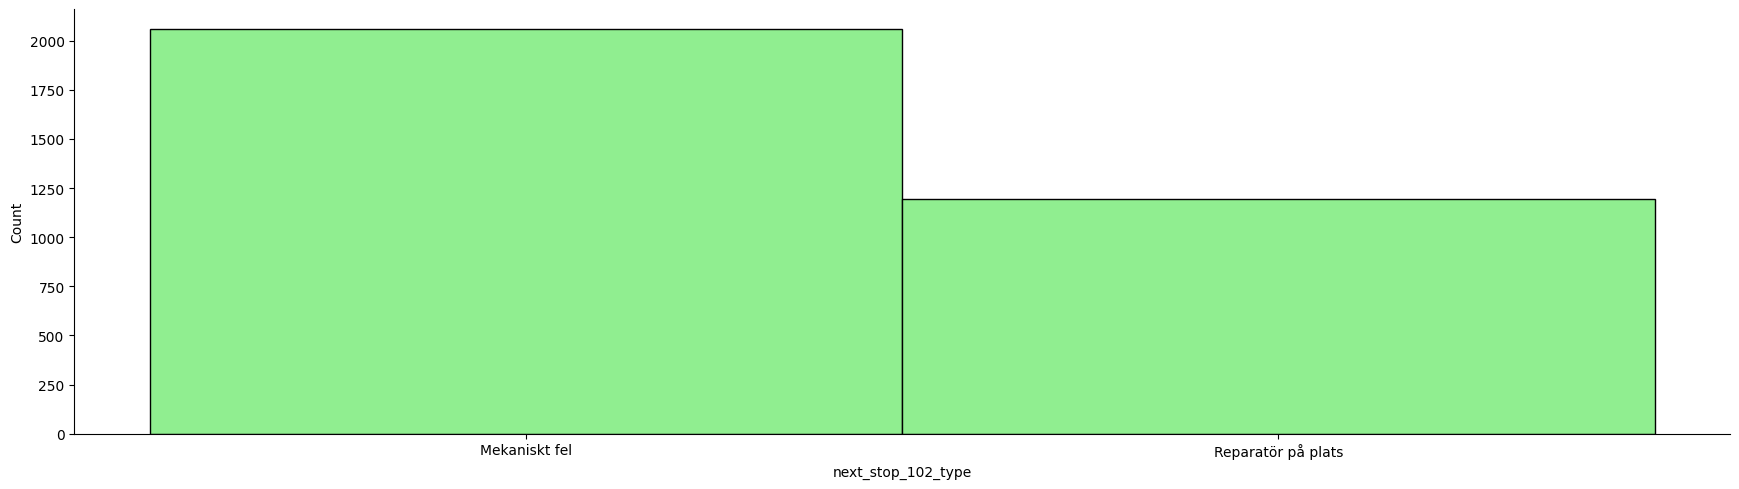

In [159]:
value_counts = df2.next_stop_102_type.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(4)
percentage = (top_values / len(df)) * 100
sns.displot(data=df2, x="next_stop_102_type", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
percentage

NaN                        67.200887
102. Uppmatning tak        12.055236
102. Dorn ruggskåp          8.809596
102. Avskjutning rullar     8.557605
102. Pusher in/ut           3.376676
Name: next_stop_102_information, dtype: float64

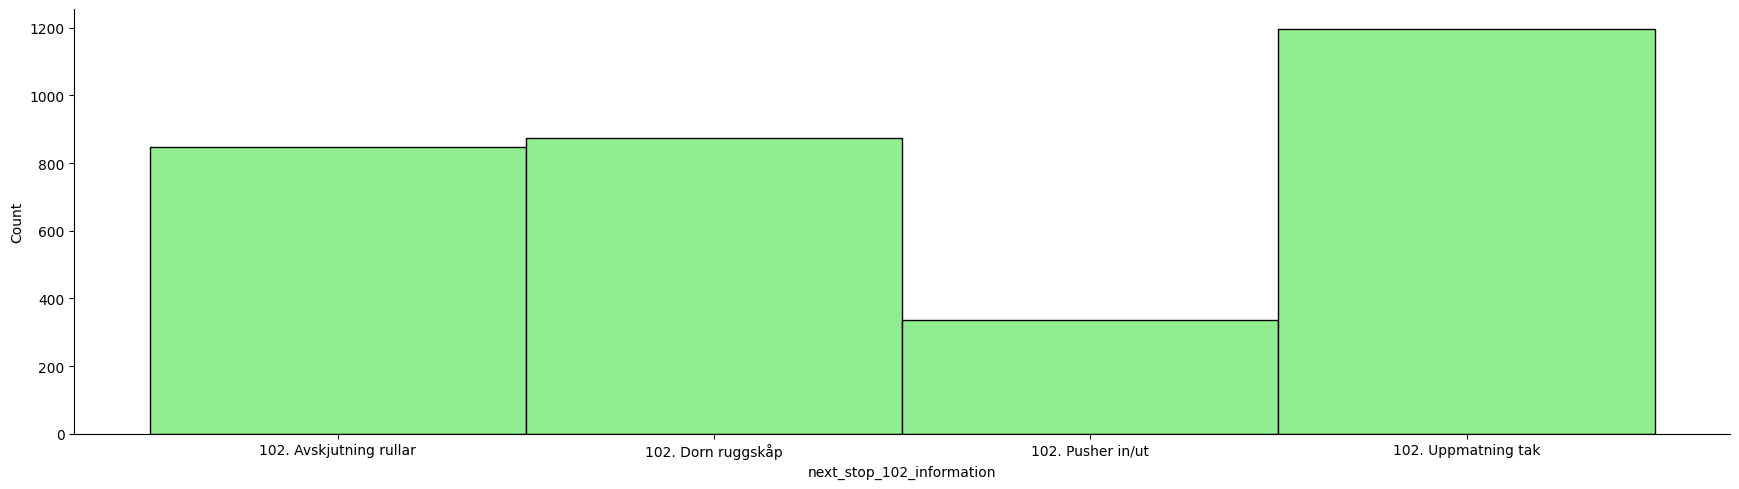

In [160]:
value_counts = df2.next_stop_102_information.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(9)
percentage = (top_values / len(df)) * 100
sns.displot(data=df2, x="next_stop_102_information", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
percentage

NaN              67.200887
Mekaniskt fel    32.799113
Name: next_stop_103_type, dtype: float64

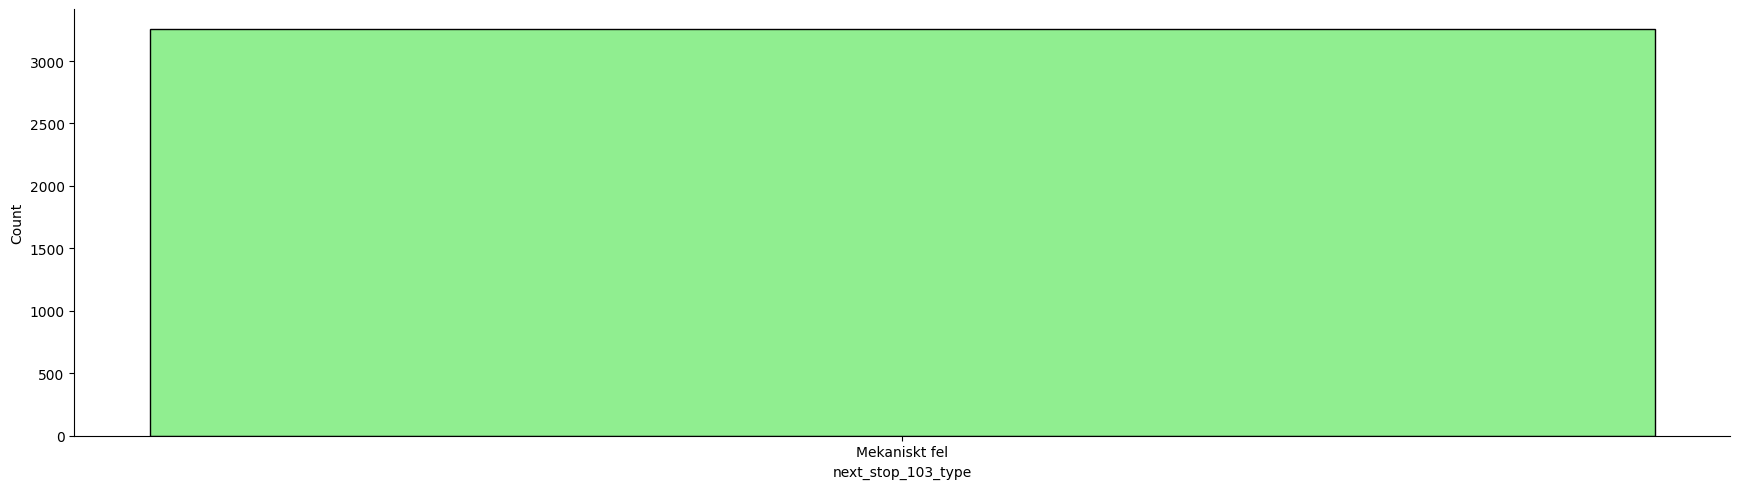

In [162]:
value_counts = df3.next_stop_103_type.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(3)
percentage = (top_values / len(df)) * 100
sns.displot(data=df3, x="next_stop_103_type", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
percentage

NaN                       67.200887
103. Montering gavel      14.917851
103. Matning gavel        12.680173
103. Montering lagring     5.201089
Name: next_stop_103_information, dtype: float64

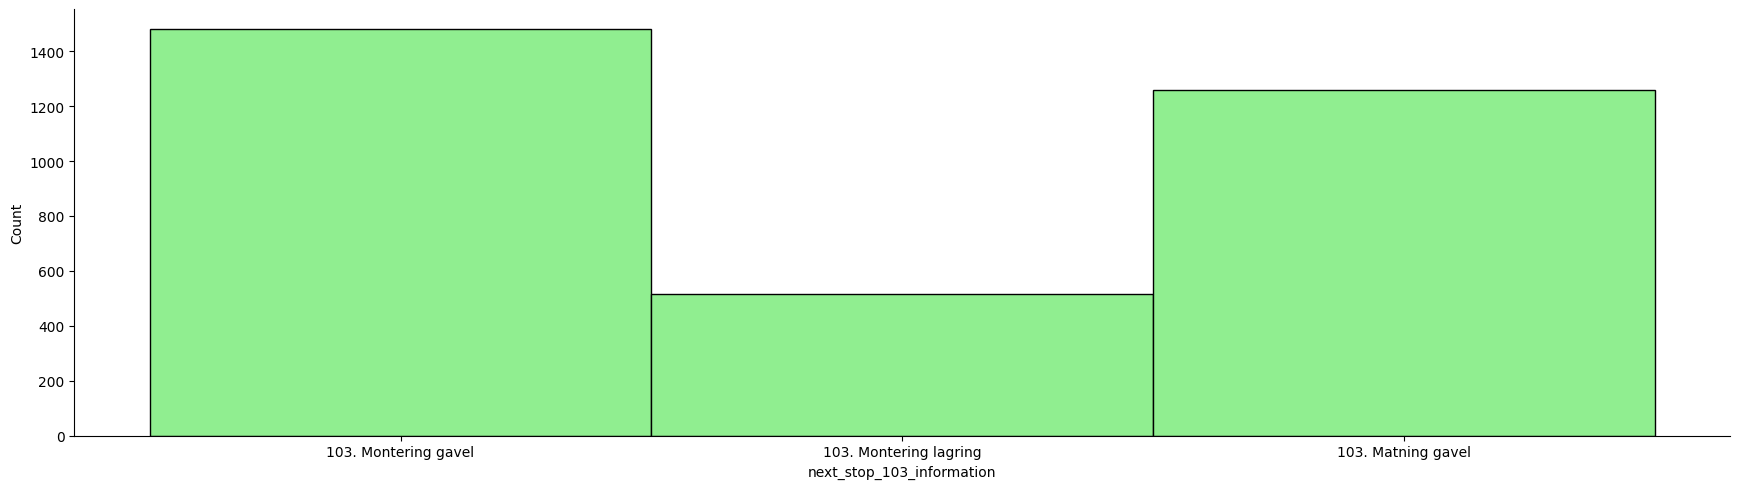

In [161]:
value_counts = df3.next_stop_103_information.value_counts(dropna=False).sort_values(ascending=False)
top_values = value_counts.head(9)
percentage = (top_values / len(df)) * 100
sns.displot(data=df3, x="next_stop_103_information", kde=False, bins = 100,color = "blue", facecolor = "lightgreen",height = 5, aspect = 3.5)
percentage

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9921 non-null   int64  
 1   time                       9921 non-null   object 
 2   humi_s101                  8921 non-null   float64
 3   humi_s1021                 9921 non-null   float64
 4   humi_s1022                 9921 non-null   float64
 5   humi_s103                  9921 non-null   float64
 6   press_s101                 9921 non-null   float64
 7   press_s1021                9921 non-null   float64
 8   press_s1022                9921 non-null   float64
 9   press_s103                 9921 non-null   float64
 10  temp_s101                  9921 non-null   float64
 11  temp_s1021                 9921 non-null   float64
 12  temp_s1022                 9921 non-null   float64
 13  temp_s103                  9921 non-null   float